# Membuat WordCloud dari Tweets

**1. Persiapan Data**

**Install Packages**

Pada pengerjaan ini, ada beberapa packages yang digunakan yaitu:
1. Package NLTK
2. Package Symspellpy
3. Package Spacy
4. Package Sastrawi
5. Package Swifter
6. Package WordCloud

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install symspellpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install swifter

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


**Melakukan Import Library**

Pertama, lakukan import library yang dibutuhkan berikut:

In [7]:
import pandas as pd 
import numpy as np
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
import nltk
%matplotlib inline
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from matplotlib import pyplot as plt
from wordcloud import STOPWORDS
from wordcloud import WordCloud 

Selanjutnya, lakukan download resources dari NLTK untuk proses text processing

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/toniafriantoni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/toniafriantoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Melakukan Persiapan Data**

Membaca file CSV yang berisi kumpulan tweets data Twitter pada periode sebelum terjadi COVID-19 yang sudah di-filter

In [10]:
#membaca file CSV
tweet_before_covid_df = pd.read_csv("data/filter/noncovid/tweet_after_filter__13122019-13032020.csv")

/Users/toniafriantoni/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,16,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Melihat sampel lima data teratas

In [11]:
#melihat sampel 5 data
tweet_before_covid_df.head(5)

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,8054,1228273430837026817,1228273430837026817,2020-02-14 18:03:00 WIB,2020-02-14,18:03:00,700,1069991112,1lleg1irl,LifeGoesOn #1 BB Hot100 🍻🍻 CJ⁷ | 💜,...,"-6.216657128974757,106.83030289065285,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,8099,1228272673391697920,1228272673391697920,2020-02-14 18:00:00 WIB,2020-02-14,18:00:00,700,1069991112,1lleg1irl,LifeGoesOn #1 BB Hot100 🍻🍻 CJ⁷ | 💜,...,"-6.216657128974757,106.83030289065285,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,8163,1228271469538336769,1228271469538336769,2020-02-14 17:55:13 WIB,2020-02-14,17:55:13,700,1069991112,1lleg1irl,LifeGoesOn #1 BB Hot100 🍻🍻 CJ⁷ | 💜,...,"-6.216657128974757,106.83030289065285,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,8834,1228260870473388032,1228260870473388032,2020-02-14 17:13:06 WIB,2020-02-14,17:13:06,700,1069991112,1lleg1irl,LifeGoesOn #1 BB Hot100 🍻🍻 CJ⁷ | 💜,...,"-6.216657128974757,106.83030289065285,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,10578,1228229024528269314,1228229024528269314,2020-02-14 15:06:33 WIB,2020-02-14,15:06:33,700,1069991112,1lleg1irl,LifeGoesOn #1 BB Hot100 🍻🍻 CJ⁷ | 💜,...,"-6.216657128974757,106.83030289065285,10km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# Text Processing

**Melakukan Case Folding**

*Case folding* bertujuan untuk mengubah semua huruf dalam sebuah dokumen teks menjadi huruf kecil (lowercase)

In [12]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].str.lower()


print('Case Folding Result : \n')
print(tweet_before_covid_df['tweet'].head(5))
print('\n\n\n')

Case Folding Result : 

0                   😭😭😭😭🤧🤧🤧🤧🤧  https://t.co/0dz2udtzgh
1    kalo tatapan bisa membunuh.. matik lo semua.. ...
2    ini malaikat pencabut nyawa lagi nyari mangsa ...
3    ini b cut cem gini??? *mimisan*kenapa ga ada e...
4        baru kemaren we makan beginian.. woohooooo...
Name: tweet, dtype: object






**Tokenizing**

*Tokenizing* adalah operasi memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut. Entitas yang bisa disebut sebagai token misalnya kata, angka, simbol, tanda baca, dan lain sebagainya

In [13]:
# ------ Tokenizing ---------
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

tweet_before_covid_df['tweet'] = tweet_before_covid_df['tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweet_before_covid_df['tweet_tokens'] = tweet_before_covid_df['tweet'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(tweet_before_covid_df['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0                                                   []
1    [kalo, tatapan, bisa, membunuh, matik, lo, semua]
2    [ini, malaikat, pencabut, nyawa, lagi, nyari, ...
3    [ini, cut, cem, gini, mimisankenapa, ga, ada, ...
4      [baru, kemaren, we, makan, beginian, woohooooo]
Name: tweet_tokens, dtype: object






**Menghitung Frekwensi**

Melakukan perhitungan frekuensi distribusi token pada tiap row data pada Dataframe 

In [14]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

tweet_before_covid_df['tweet_tokens_fdist'] = tweet_before_covid_df['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(tweet_before_covid_df['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0                                                   []
1    [(kalo, 1), (tatapan, 1), (bisa, 1), (membunuh...
2    [(ini, 1), (malaikat, 1), (pencabut, 1), (nyaw...
3    [(ini, 1), (cut, 1), (cem, 1), (gini, 1), (mim...
4    [(baru, 1), (kemaren, 1), (we, 1), (makan, 1),...
Name: tweet_tokens_fdist, dtype: object


**Filtering (Stopword Removal)**

Menghilangkan kata umum (*common words*) yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

In [15]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sudah', 'benar', 'sampai', 'kayak',
                       'engga','banget', 'memang', 'pakai', 'hahaha', 'pas', 
                       'ya', 'gua', 'gue', 'ya', 'memang', 'bang', 'ku', 'doang',
                      'begini', 'coba', 'sudah', 'pakai', 'sama', 'aku', 'pengin',
                      'kaya', 'kemarin',])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet_before_covid_df['tweet_tokens_WSW'] = tweet_before_covid_df['tweet_tokens'].apply(stopwords_removal) 


print(tweet_before_covid_df['tweet_tokens_WSW'].head())

0                                                 []
1                         [tatapan, membunuh, matik]
2         [malaikat, pencabut, nyawa, nyari, mangsa]
3    [cut, cem, gini, mimisankenapa, emoji, mimisan]
4                        [kemaren, makan, woohooooo]
Name: tweet_tokens_WSW, dtype: object


**Normalization**

Normalization digunakan untuk menyeragamkan term yang memiliki makna sama namun penulisanya berbeda, bisa diakibatkan kesalahan penulisan, penyingkatan kata, ataupun “bahasa gaul”.

In [16]:
normalizad_word = pd.read_csv("colloquial-indonesian-lexicon.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweet_before_covid_df['tweet_normalized'] = tweet_before_covid_df['tweet_tokens_WSW'].apply(normalized_term)

tweet_before_covid_df['tweet_normalized'].head(10)

0                                                   []
1                           [tatapan, membunuh, matik]
2         [malaikat, pencabut, nyawa, mencari, mangsa]
3    [cut, macam, begini, mimisankenapa, emoji, mim...
4                          [kemarin, makan, woohooooo]
5                            [wadawww, grand, central]
6                                     [katalk, dibuka]
7                                           [taehyung]
8                 [jadikan, bts, model, iklan, bighit]
9                             [anak, mamah, tahun, sd]
Name: tweet_normalized, dtype: object

**Stemming**

Function stemmer dari library Sastrawi untuk mengembalikan kata kebentuk dasarnya. Karena fungsi stemmer.stem() pada library Sastrawi lambat, kita dapat menggunakan library swifter untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel. Kecepatan pemrosesan bisa dua kali bahkan lebih cepat jika tanpa menggunakan swifter. Hal ini bergantung pada jumlah core yang dimiliki oleh komputer yang kita gunakan, defaultnya akan digunakan npartitions = cpu_count()*2.

In [ ]:

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet_before:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet_before_covid_df['tweet_tokens_stemmed'] = tweet_before_covid_df['tweet_normalized'].swifter.apply(get_stemmed_term)
print(tweet_before_covid_df['tweet_tokens_stemmed'])

#save to csv
tweet_before_covid_df['tweet_tokens_stemmed'].to_csv('output/before_covid.csv')

**Menampilkan WordCloud**

Membuat file penyimpanan hasil normalisasi ke **teks_str_before_covid.txt**

In [22]:
import os

#create folder data before covid-19
if not os.path.exists('output/teks_str_before_covid.txt'):
    f= open("output/teks_str_before_covid.txt","w+")

Membuat fungsi untuk menggabungkan list menjadi string

In [23]:
def listToString(s): 
    
    str = ', '.join(s)
    
    return str

Memanggil fungsi untuk konversi list ke bentuk string

In [24]:
tweets_string = []

for i, row in tweet_before_covid_df['tweet_normalized'].iteritems():
    str = listToString(row)
    #tweets_string.append(str)
    f=open("output/teks_str_before_covid.txt", "a+")
    f.write(" {}".format(str))

In [25]:
with open('output/teks_str_before_covid.txt', 'r') as file:
    data = file.read().replace('\n', '')

In [37]:
data = data.replace("memang", "");
data = data.replace("enggak", "");
data = data.replace("saja", "");
data = data.replace("belum", "");
data = data.replace("sudah", "");
data = data.replace("pakai", "");
data = data.replace("sampai", "");
data = data.replace("sama", "");
data = data.replace("begini", "");
data = data.replace("kok", "");
data = data.replace("ya", "");
data = data.replace("ada", "");
data = data.replace("aku", "");
data = data.replace("tau", "");
data = data.replace("dapat", "");
data = data.replace("pengin", "");
data = data.replace("anjir", "");

Menampilkan wordcloud

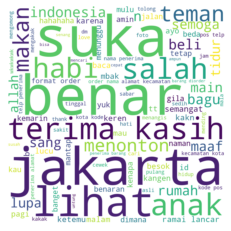

In [42]:
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(data)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()